In [2]:
# Import required libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('data.csv')  # Make sure 'data.csv' is uploaded in Colab files

# Display the first few rows
df.head()


,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [3]:
# View dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


In [4]:
# View summary statistics for numerical columns
df.describe()

,year,value
count,12654.000000,1.265400e+04
mean,2019.822112,4.273742e+05
std,5.476494,6.860498e+06
min,2010.000000,1.200000e-06
25%,2016.000000,2.000000e+00
50%,2020.000000,1.300000e+02
75%,2022.000000,5.500000e+03
max,2035.000000,4.400000e+08


In [5]:
# View summary statistics for all columns including categorical
df.describe(include='all')

,region,category,parameter,mode,powertrain,year,unit,value
count,12654,12654,12654,12654,12654,12654.000000,12654,1.265400e+04
unique,54,3,8,5,6,NaN,6,NaN
top,World,Historical,EV stock,Cars,EV,NaN,Vehicles,NaN
freq,1250,9174,3470,4706,4894,NaN,6842,NaN
mean,NaN,NaN,NaN,NaN,NaN,2019.822112,NaN,4.273742e+05
std,NaN,NaN,NaN,NaN,NaN,5.476494,NaN,6.860498e+06
min,NaN,NaN,NaN,NaN,NaN,2010.000000,NaN,1.200000e-06
25%,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,2.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,2020.000000,NaN,1.300000e+02
75%,NaN,NaN,NaN,NaN,NaN,2022.000000,NaN,5.500000e+03


In [6]:
# Check unique values in categorical columns to guide plotting
for col in ['region', 'category', 'parameter', 'mode', 'powertrain', 'unit']:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())


Unique values in region:
['Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria' 'Canada' 'Chile'
 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'EU27' 'Europe' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Ireland' 'Israel' 'Italy'
 'Japan' 'Korea' 'Latvia' 'Lithuania' 'Luxembourg' 'Mexico' 'Netherlands'
 'New Zealand' 'Norway' 'Poland' 'Portugal' 'Rest of the world' 'Romania'
 'Seychelles' 'Slovakia' 'Slovenia' 'South Africa' 'Spain' 'Sweden'
 'Switzerland' 'Thailand' 'Turkiye' 'United Arab Emirates'
 'United Kingdom' 'USA' 'World']

Unique values in category:
['Historical' 'Projection-STEPS' 'Projection-APS']

Unique values in parameter:
['EV stock share' 'EV sales share' 'EV sales' 'EV stock'
 'EV charging points' 'Electricity demand' 'Oil displacement Mbd'
 'Oil displacement, million lge']

Unique values in mode:
['Cars' 'EV' 'Buses' 'Vans' 'Trucks']

Unique values in powertrain:
['EV' 'BEV' 'PHEV' 'Publicl

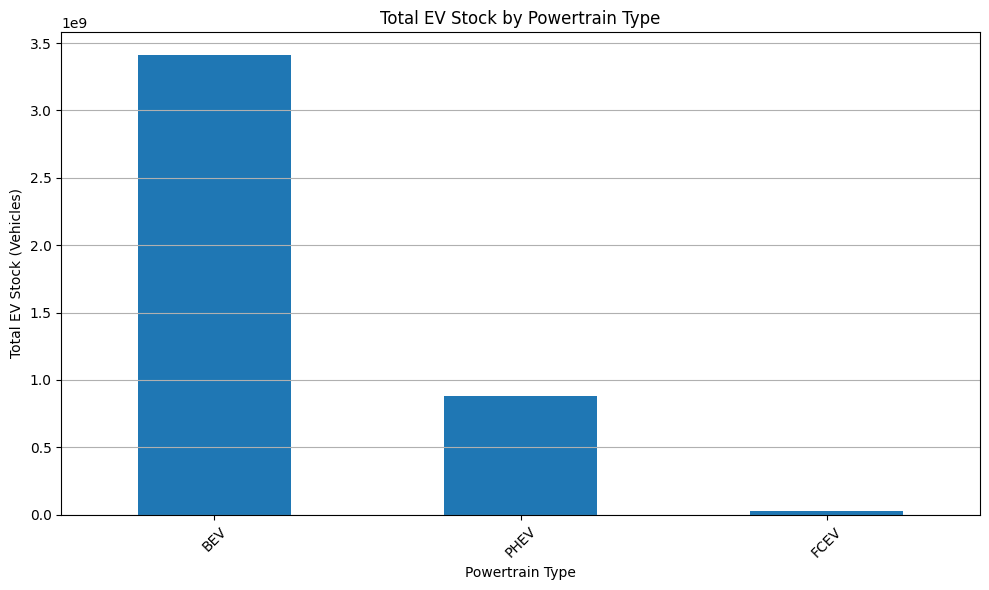

In [7]:
import matplotlib.pyplot as plt

def plot_ev_stock_by_powertrain(df):
    """
    Plots a bar chart showing total EV stock by powertrain type.
    Only rows with parameter='EV stock' and unit='Vehicles' are considered.
    """
    filtered = df[(df['parameter'] == 'EV stock') & (df['unit'] == 'Vehicles')]
    grouped = filtered.groupby('powertrain')['value'].sum().sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    grouped.plot(kind='bar')
    plt.title('Total EV Stock by Powertrain Type')
    plt.xlabel('Powertrain Type')
    plt.ylabel('Total EV Stock (Vehicles)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()

# Call the function
plot_ev_stock_by_powertrain(df)


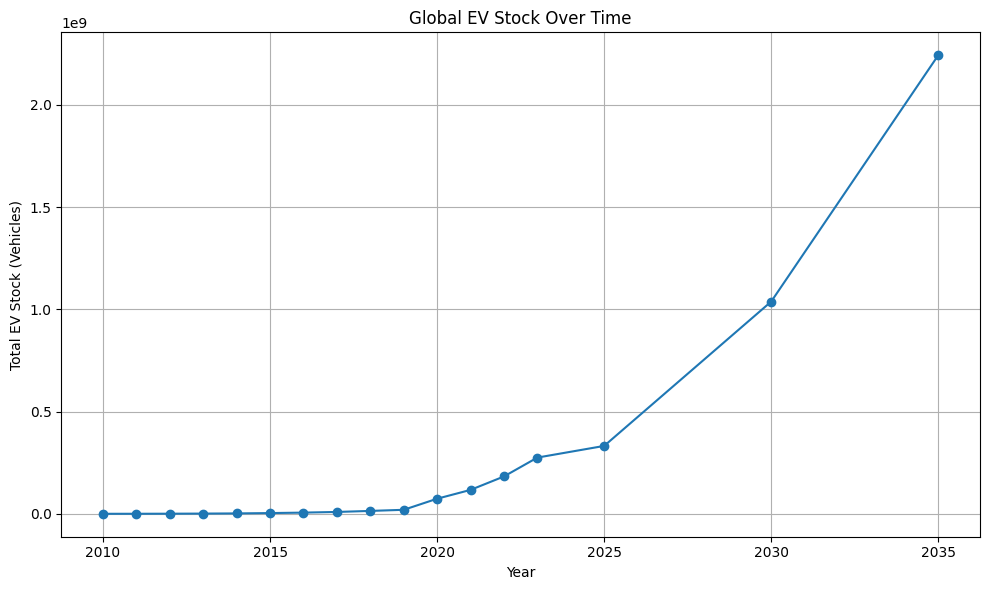

In [8]:
def plot_ev_stock_over_time(df):
    """
    Plots a line chart showing global EV stock (in vehicles) over the years.
    Only includes rows where parameter='EV stock' and unit='Vehicles'.
    """
    filtered = df[(df['parameter'] == 'EV stock') & (df['unit'] == 'Vehicles')]
    grouped = filtered.groupby('year')['value'].sum()

    plt.figure(figsize=(10, 6))
    grouped.plot(kind='line', marker='o')
    plt.title('Global EV Stock Over Time')
    plt.xlabel('Year')
    plt.ylabel('Total EV Stock (Vehicles)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function
plot_ev_stock_over_time(df)


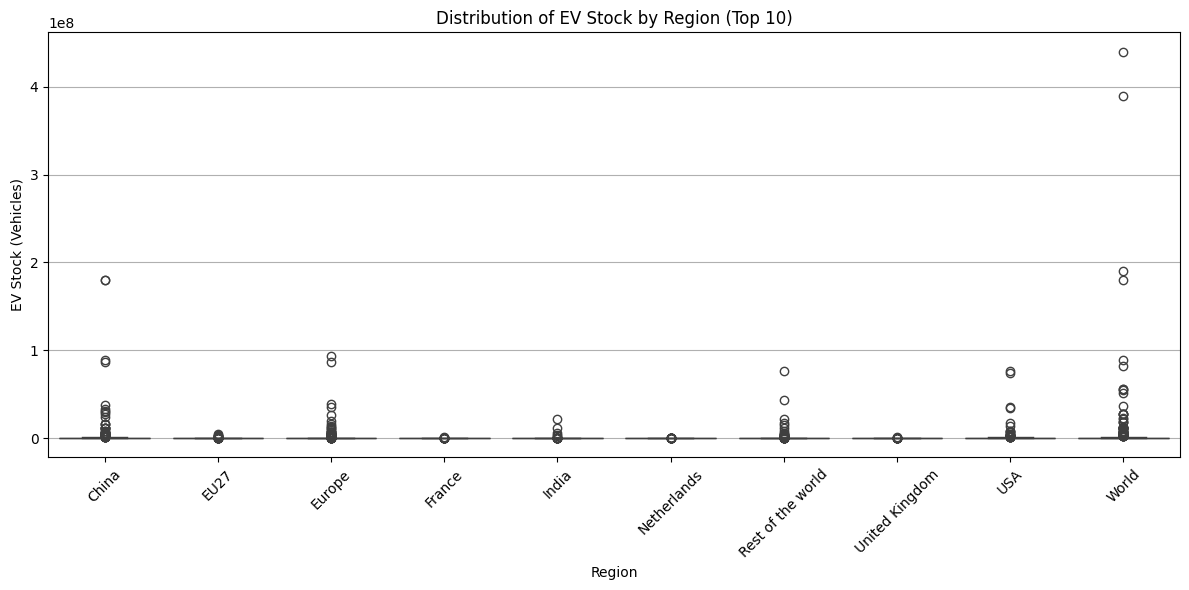

In [9]:
import seaborn as sns

def plot_ev_stock_distribution_by_region(df):
    """
    Plots a box plot showing the distribution of EV stock by region.
    Only includes rows where parameter='EV stock' and unit='Vehicles'.
    """
    filtered = df[(df['parameter'] == 'EV stock') & (df['unit'] == 'Vehicles')]

    # Limit to top 10 regions with most data
    top_regions = filtered['region'].value_counts().head(10).index
    subset = filtered[filtered['region'].isin(top_regions)]

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=subset, x='region', y='value')
    plt.title('Distribution of EV Stock by Region (Top 10)')
    plt.xlabel('Region')
    plt.ylabel('EV Stock (Vehicles)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()

# Call the function
plot_ev_stock_distribution_by_region(df)


In [11]:
# Focus on EV stock (vehicles only)
ev_stock_df = df[(df['parameter'] == 'EV stock') & (df['unit'] == 'Vehicles')]

# Summary statistics
mean_val = ev_stock_df['value'].mean()
median_val = ev_stock_df['value'].median()
std_val = ev_stock_df['value'].std()
skew_val = ev_stock_df['value'].skew()
kurt_val = ev_stock_df['value'].kurt()

print("EV Stock Statistical Summary:")
print(f"Mean: {mean_val:,.2f}")
print(f"Median: {median_val:,.2f}")
print(f"Standard Deviation: {std_val:,.2f}")
print(f"Skewness: {skew_val:.2f}")
print(f"Kurtosis: {kurt_val:.2f}")


EV Stock Statistical Summary:
Mean: 1,244,387.98
Median: 1,500.00
Standard Deviation: 12,906,446.13
Skewness: 23.27
Kurtosis: 670.49
